<a href="https://colab.research.google.com/github/pragmatic-philosopher09/Feynn-Labs-Market-Segmentation-Internship-Task-/blob/main/Feynn_Lab_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
bp=pd.read_csv("cardio_train.csv",sep=";")
bp.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#Checking NULL Values
bp.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

####**The data set shows there is no null values** 

In [ ]:
bp.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure (ap_hi and ap_lo), are unrealistic. This suggests the presence of outliers in the data.



In [ ]:
# check distribution of target variable
bp.cardio.value_counts()


0    35021
1    34979
Name: cardio, dtype: int64

35,021 out of 70,000 cases in this dataset are labelled as having no cardiovascular disease, and 34,979 cases are labelled as having cardiovascular disease. This suggests that the dataset is balanced.



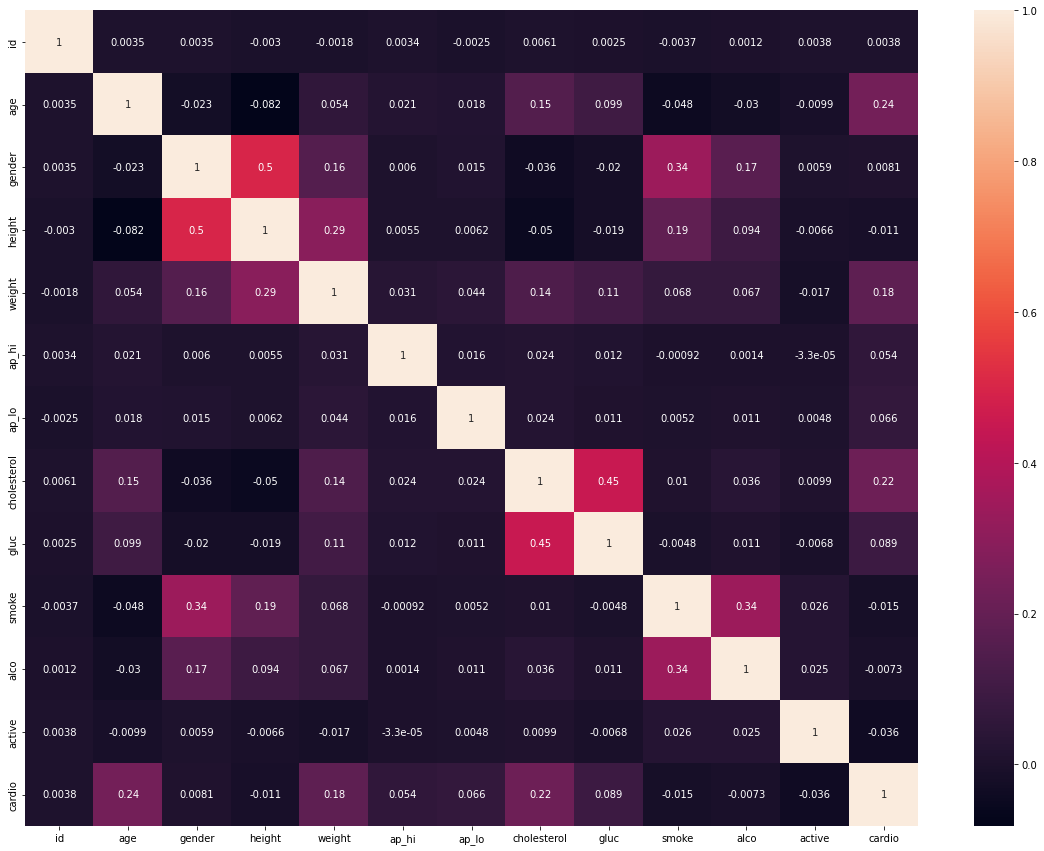

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(bp.corr(), annot=True)


# **Segmentation & Analysis of Diabetes Market**

## **Exploratory Data Analysis & Data Cleaning**

In [13]:
dia=pd.read_csv("diabetes.csv")
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
## Checking For Null Values

dia.isnull().values.any()

False

#### So, it means that there aren't any null values.

In [15]:
# Descriptive Stats

dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Following inferences can be drawn:

1. Min. value of many var is 0.
2. Biological parameters can't have value as 0, but there are still many that have this, maybe NaN values have been hardcoded to circumvent.

In [16]:
# Checking Zero Values & Displaying Sum Of Such Values In All Columns

(dia.Pregnancies == 0).sum(),(dia.Glucose==0).sum(),(dia.BloodPressure==0).sum(),(dia.SkinThickness==0).sum(),(dia.Insulin==0).sum(),(dia.BMI==0).sum(),(dia.DiabetesPedigreeFunction==0).sum(),(dia.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

In [17]:
drop_Glu=dia.index[dia.Glucose == 0].tolist()
drop_BP=dia.index[dia.BloodPressure == 0].tolist()
drop_Skin = dia.index[dia.SkinThickness==0].tolist()
drop_Ins = dia.index[dia.Insulin==0].tolist()
drop_BMI = dia.index[dia.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dia=dia.drop(dia.index[c])

#### Zeroes were dropped, and dataset is cleaner than before!

In [18]:
dia1 = dia[dia.Outcome==1]
dia0 = dia[dia.Outcome==0]

In [19]:
dia1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174,88,37,120,44.5,0.646,24,1
740,11,120,80,37,150,42.3,0.785,48,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


#### Main dataframe has been bifurcated into two more dataframes, showing positive and negative results of having contracted diabetes mellitus.

Text(0.5, 1.0, 'Count Plot for Outcome')

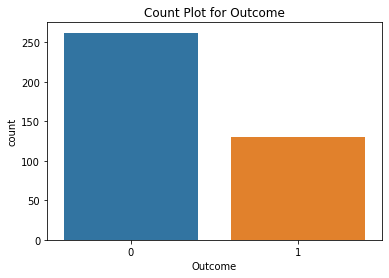

In [20]:
# Plotting Count Of Such Persons Who Might Be Afflicted With Diabetes

sns.countplot(x=dia.Outcome)
plt.title("Count Plot for Outcome")

In [21]:
# Calculating the % of diabetic and non-diabetic in the sample

Out0=len(dia[dia.Outcome==1])
Out1=len(dia[dia.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0

(66.83673469387755, 33.16326530612245)

#### Thus, we can see that 66.837% of patients are diabetic in the sample dataset taken from a random sample of people, which indicates that people are more likely to have diabetes, making exploration in providing medicinal recourse a lucrative endeavour.

#### Now, we'll begin screening all the biological parameters given in the dataset one-by-one.

### Pregnancies:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

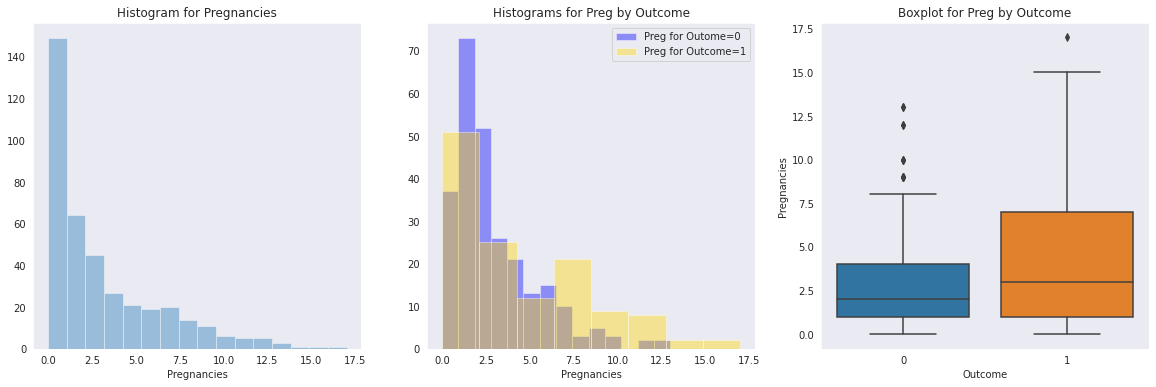

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(dia.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(dia1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Pregnancies)
plt.title("Boxplot for Preg by Outcome")